In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import warnings

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore') 

from src import crs, PublicPredictor
from src.dbc import utils, TimeDivisionKMeans

In [3]:
# 1. load_excel
data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
p, m = crs.utils.data_preprocessing(xlsx)

m.set_index("month", inplace=True)

# 3. data init
_month = 1

month_df = pd.DataFrame(m.loc[_month])
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']

PUBLIC_PERCENTAGE = 30
APT = crs.utils.get_APT(month_df, PUBLIC_PERCENTAGE)

calc = crs.models.ManagementOffice(
        month=_month,
        households=month_df,
        APT=APT,
        contract="단일계약"
    )
apt = calc.apart

In [4]:
m_15 = utils.data_preprocessing(xlsx)

df = utils.dimension_reduction(m_15)
m_60 = df.copy()

m_60.head()

m_60_1 = m_60[m_60.index.month == 1].copy()
m_60_1.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2019-01-01 00:00:00,0.033,0.000,0.034,0.037,0.062,0.322,0.240,0.295,0.373,0.243,...,0.534,0.188,0.400,0.318,0.420,0.626,0.484,0.289,0.305,0.652
2019-01-01 01:00:00,0.048,0.000,0.033,0.037,0.063,0.185,0.257,0.397,0.257,0.228,...,0.396,0.434,0.355,0.250,0.465,0.409,0.459,0.336,0.332,0.557
2019-01-01 02:00:00,0.032,0.000,0.039,0.036,0.062,0.175,0.384,0.353,0.123,0.141,...,0.194,0.337,0.379,0.274,0.326,0.307,0.405,0.382,0.311,0.491
2019-01-01 03:00:00,0.033,0.000,0.039,0.037,0.062,0.167,0.276,0.488,0.142,0.159,...,0.286,0.263,0.375,0.264,0.336,0.345,0.298,0.291,0.261,0.511
2019-01-01 04:00:00,0.032,0.001,0.033,0.037,0.063,0.197,0.266,0.278,0.190,0.227,...,0.275,0.245,0.310,0.423,0.360,0.364,0.212,0.347,0.294,0.507


In [5]:
from src import KMeans

kmeans = KMeans(datas=m_60_1.T.values)

ECV : 51 %


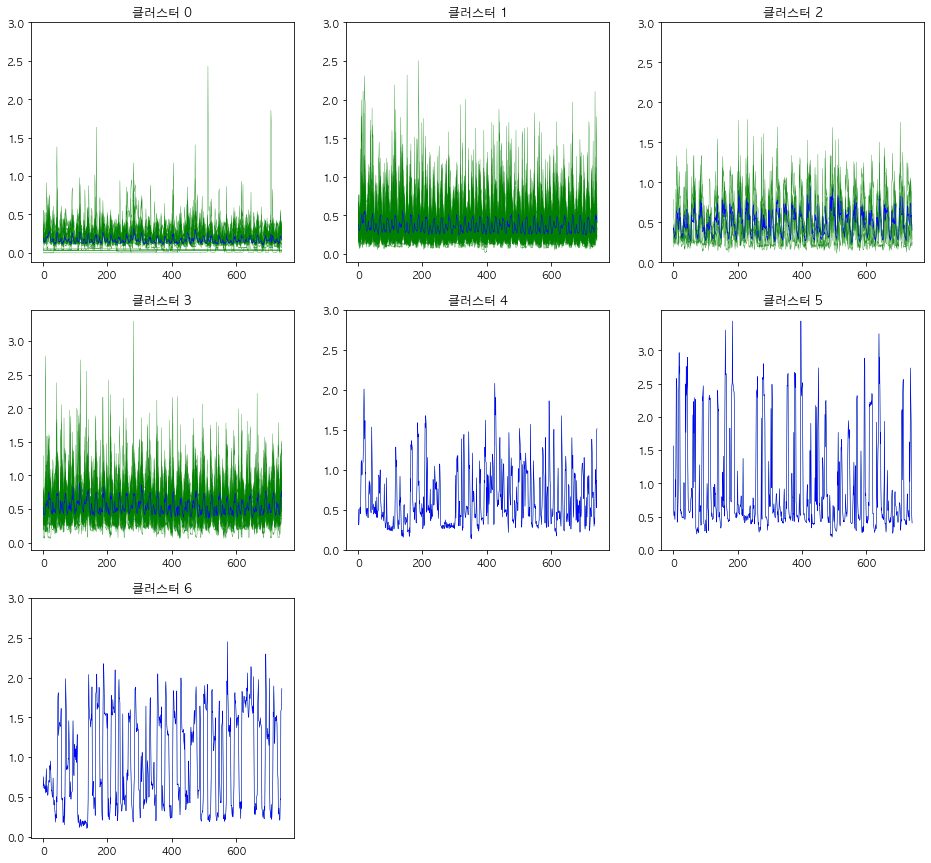

In [35]:
kmeans.fit()
kmeans.sorting()
kmeans.draw_plot()

In [36]:
month_df = pd.DataFrame(
    np.column_stack([m_60_1.columns.values, m_60_1.sum(axis=0).round().astype("int")]),
    columns=['가구명', 'usage (kWh)']
)
group_df = month_df.copy()
group_df['label'] = kmeans.labels_.astype("int")

group_df.head()

,가구명,usage (kWh),label
0,아파트1-104-1206,99,0
1,아파트1-104-303,10,0
2,아파트1-104-1307,23,0
3,아파트1-104-1208,40,0
4,아파트1-104-408,39,0


In [37]:
cluster_df = pd.DataFrame(kmeans.clusters_.T, index=m_60_1.index)

cluster_df.loc['토탈'] = cluster_df.sum().round()
cluster_df.tail()

,0,1,2,3,4,5,6
2019-01-31 20:00:00,0.19285,0.448113,0.588000,0.710308,0.876,1.940,1.582
2019-01-31 21:00:00,0.19245,0.463113,0.590667,0.712731,0.527,0.564,1.594
2019-01-31 22:00:00,0.18695,0.492377,0.485667,0.765269,1.480,0.531,1.719
2019-01-31 23:00:00,0.17075,0.415340,0.400000,0.682231,1.517,0.405,1.861
토탈,123.00000,266.000000,366.000000,402.000000,473.000,689.000,711.000


# 이상치 패턴

In [38]:
min_anomaly_data = pd.DataFrame()

for label in range(kmeans.K - 1):
    now_step_df = group_df[group_df['label'] == label]
    next_step_min = group_df[group_df['label'] == (label + 1)]['usage (kWh)'].min()
    chk_idx = now_step_df['usage (kWh)'] > next_step_min\
    
    chk = now_step_df[chk_idx]
    
    if len(chk) != 0:
        min_anomaly_data = min_anomaly_data.append(
            chk
        )
    
min_anomaly_data

,가구명,usage (kWh),label
17,아파트1-102-203,326,1
27,아파트1-101-402,345,1
48,아파트1-103-1806,331,1
54,아파트1-103-1104,341,1
85,아파트1-101-301,324,1
100,아파트1-103-503,327,1
13,아파트1-103-1502,397,2
28,아파트1-101-303,376,2
52,아파트1-103-1803,420,2
59,아파트1-103-106,351,2


In [39]:
max_anomaly_data = pd.DataFrame()

for label in range(1,kmeans.K):
    now_step_df = group_df[group_df['label'] == label]
    next_step_min = group_df[group_df['label'] == (label - 1)]['usage (kWh)'].max()
    chk_idx = now_step_df['usage (kWh)'] < next_step_min\
    
    chk = now_step_df[chk_idx]
    
    if len(chk) != 0:
        max_anomaly_data = max_anomaly_data.append(
            chk
        )
    
max_anomaly_data

,가구명,usage (kWh),label
36,아파트1-101-504,322,2
99,아파트1-103-1905,329,2
11,아파트1-103-1602,387,3
23,아파트1-101-1602,350,3
30,아파트1-101-1403,380,3
38,아파트1-102-301,416,3
43,아파트1-102-802,406,3
46,아파트1-103-1805,386,3
51,아파트1-103-1903,405,3
60,아파트1-103-1706,381,3


In [11]:
group_df[group_df['label'] == 1]

,가구명,usage (kWh),label
6,아파트1-103-1402,218,1
7,아파트1-103-402,228,1
9,아파트1-103-801,223,1
10,아파트1-103-502,236,1
12,아파트1-103-301,222,1
14,아파트1-103-202,319,1
16,아파트1-102-603,251,1
17,아파트1-102-203,326,1
18,아파트1-102-704,255,1
19,아파트1-102-703,257,1


In [12]:
group_df[group_df['label'] == 1]['usage (kWh)'].mean()

266.39622641509436

In [13]:
group_df[group_df['label'] == 2]['usage (kWh)']

13    397
28    376
36    322
52    420
59    351
99    329
Name: usage (kWh), dtype: object

In [14]:
import matplotlib
import matplotlib.pyplot as plt

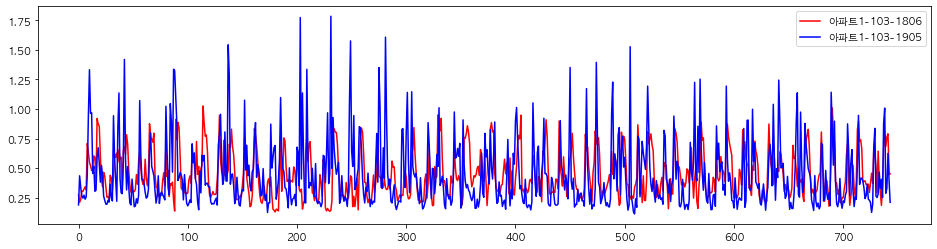

In [15]:
plt.figure(figsize=(16, 4))

plt.plot(m_60_1[min_anomaly_data['가구명'].values[2]].values, c='r',label=min_anomaly_data['가구명'].values[2])
plt.plot(m_60_1[max_anomaly_data['가구명'].values[1]].values, c='b', label=max_anomaly_data['가구명'].values[1])

plt.legend(loc='upper right')

plt.show()

In [16]:
label_1_cluster = cluster_df[1].values[:-1]
label_2_cluster = cluster_df[2].values[:-1]

min_check = m_60_1[min_anomaly_data['가구명'].values[2]].values
max_check = m_60_1[max_anomaly_data['가구명'].values[1]].values

check_point = [
    [label_1_cluster, min_check, min_anomaly_data['가구명'].values[2]],
    [label_2_cluster, max_check, max_anomaly_data['가구명'].values[1]],
]

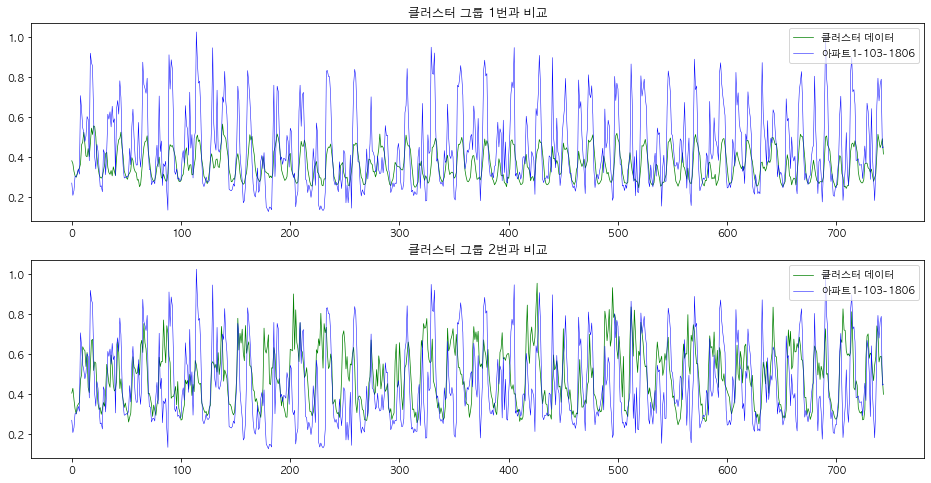

In [17]:
plt.figure(figsize=(16,8))

for idx,chk in enumerate(check_point):
    ax = plt.subplot(2, 1, idx+1)
    ax.plot(chk[0], color='g', linewidth=0.7, label='클러스터 데이터')
    ax.plot(min_check, color='b', linewidth=0.5, label=check_point[0][2])
    ax.set_title("클러스터 그룹 {}번과 비교".format(idx + 1))
    ax.legend(loc='upper right')

plt.show()

# Eucliean Distance Trouble

In [18]:
from sklearn.metrics.pairwise import euclidean_distances as euc

In [315]:
chk_1.sum()

350.85

In [327]:
pat_1 = check_point[0][0]
pat_2 = check_point[1][0]

chk_1 = check_point[0][1]
chk_name = check_point[0][2]

euc(
    chk_1.reshape(1,-1),
    pat_2.reshape(1,-1)
)

array([[10.19484822]])

In [322]:
min_mem = []
err_mem = []

for idx,p_1 in enumerate(pat_1):
    c_1 = chk_1[idx]
    min_mem.append(
        min(c_1, p_1)
    )
    err_mem.append(
        abs(c_1 - p_1)
    )

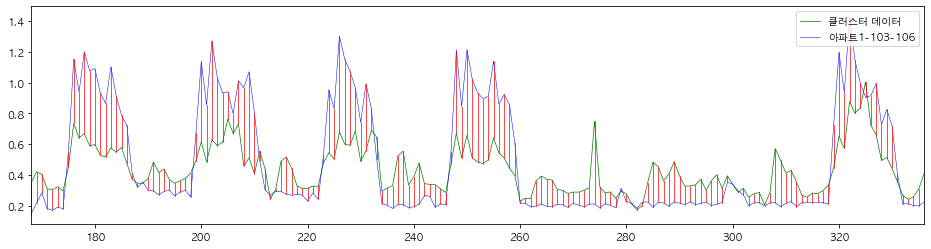

In [323]:
plt.figure(figsize=(16,4))

plt.plot(pat_1, color='g', linewidth=0.7, label="클러스터 데이터")
plt.plot(chk_1, color='b', linewidth=0.5, label=chk_name)

for idx, _min in enumerate(min_mem):
    _err = err_mem[idx]
    plt.plot([idx, idx],[_min, _min+_err], c='r', linewidth=0.7)

plt.xlim([168 * 1, 168 * 2])
plt.legend(loc='upper right')

plt.show()

In [324]:
min_mem = []
err_mem = []

for idx,p_2 in enumerate(pat_2):
    c_1 = chk_1[idx]
    min_mem.append(
        min(c_1, p_2)
    )
    err_mem.append(
        abs(c_1 - p_2)
    )

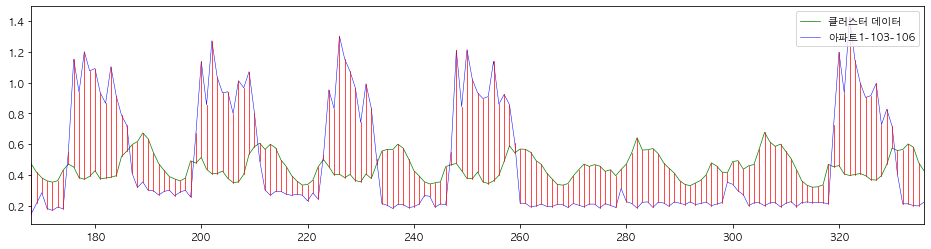

In [325]:
plt.figure(figsize=(16,4))

plt.plot(pat_2, color='g', linewidth=0.7, label="클러스터 데이터")
plt.plot(chk_1, color='b', linewidth=0.5, label=chk_name)

for idx, _min in enumerate(min_mem):
    _err = err_mem[idx]
    plt.plot([idx, idx],[_min, _min+_err], c='r', linewidth=0.7)

plt.xlim([168 * 1, 168 * 2])
plt.legend(loc='upper right')

plt.show()

In [345]:
inc_mem_pat_1 = np.array([pat_1[0]])

for p_1 in pat_1[1:]:
    inc_mem_pat_1 = np.append(inc_mem_pat_1, 
                             inc_mem_pat_1[-1] + p_1)

In [346]:
inc_mem_pat_2 = np.array([pat_2[0]])

for p_1 in pat_2[1:]:
    inc_mem_pat_2 = np.append(inc_mem_pat_2, 
                             inc_mem_pat_2[-1] + p_1)

In [347]:
inc_mem_chk_1 = np.array([chk_1[0]])

for p_1 in chk_1[1:]:
    inc_mem_chk_1 = np.append(inc_mem_chk_1, 
                             inc_mem_chk_1[-1] + p_1)

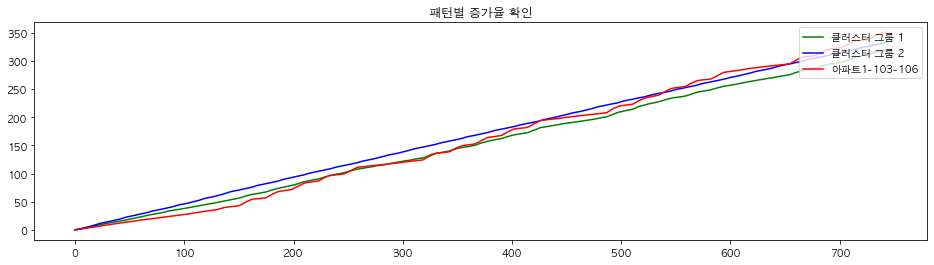

In [352]:
plt.figure(figsize=(16,4))

plt.plot(inc_mem_pat_1, color='g', label="클러스터 그룹 1")
plt.plot(inc_mem_pat_2, color='b', label="클러스터 그룹 2")
plt.plot(inc_mem_chk_1, color='r', label=chk_name)

plt.title("패턴별 증가율 확인")
plt.legend(loc="upper right")

plt.show()